In [32]:
import pandas as pd
import numpy as np

import sys;import os;
module_path = os.path.abspath(os.path.join('..')).split('PythonCode')[0]+'PythonCode'
if module_path not in sys.path: sys.path.append(module_path+"/")

# Plib imports
import Plib.DataFarm.MStack as ms    #30Y hist. stock, realtime, intraday, 75 indices

In [33]:
prices = pd.DataFrame([1035.23, 1032.47, 1011.78, 1010.59, 1016.03, 1007.95, 
          1022.75, 1021.52, 1026.11, 1027.04, 1030.58, 1030.42,
          1036.24, 1015.00, 1015.20])
prices.columns=['prices']

daily_return = prices.pct_change(1) # 1 for ONE DAY lookback
monthly_return = prices.pct_change(21) # 21 for ONE MONTH lookback
six_months_return= prices.pct_change(periods = 6) #Six months return
annual_return = prices.pct_change(252) # 252 for ONE YEAR lookback

daily_return

prices
0        NaN
1  -0.002666
2  -0.020039
3  -0.001176
4   0.005383
5  -0.007953
6   0.014683
7  -0.001203
8   0.004493
9   0.000906
10  0.003447
11 -0.000155
12  0.005648
13 -0.020497
14  0.000197

#### Resampling data from daily to monthly returns. However, business computations are done at end of the period:

In [54]:
myseries=ms.get_mstackHdata('GSPC.INDX','2021-01-01','2022-08-01',limit=80)[['Close']]

/Users/rob/Desktop/PythonCode/Plib/DataFarm/MStack.py:58: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(resp['data']['eod'])
/Users/rob/Desktop/PythonCode/Plib/DataFarm/MStack.py:67: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  temp = json_normalize(resp2['data']['eod'])


In [55]:
myseries=myseries.Close.asfreq('M').ffill() # add the end of period date. if missing with value the previous one
returns=myseries.pct_change(1)
returns.head(10)

Date
2021-01-31         NaN
2021-02-28         NaN
2021-03-31         NaN
2021-04-30    0.052425
2021-05-31    0.000000
2021-06-30    0.027822
2021-07-31    0.000000
2021-08-31    0.052398
2021-09-30   -0.047569
2021-10-31    0.000000
Freq: M, Name: Close, dtype: float64

#### Windsorizations

In [3]:
outlier_cutoff = 0.01
daily_return.clip(lower=daily_return.quantile(outlier_cutoff),
        upper=daily_return.quantile(1-outlier_cutoff),axis=1)

prices
0        NaN
1  -0.002666
2  -0.020039
3  -0.001176
4   0.005383
5  -0.007953
6   0.013509
7  -0.001203
8   0.004493
9   0.000906
10  0.003447
11 -0.000155
12  0.005648
13 -0.020438
14  0.000197

#### Performance comparisons

In [4]:
%%timeit
daily_returns2 = (prices.prices/prices.prices.shift(1))-1

The slowest run took 4.01 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 362 µs per loop


In [5]:
%%timeit
daily_returns3 = prices.prices.diff()/prices.prices.shift(1)

1000 loops, best of 5: 347 µs per loop


In [6]:
daily_returns2 = (prices.prices/prices.prices.shift(1))-1
daily_returns2 = daily_returns2[1:]
daily_returns2

1    -0.002666
2    -0.020039
3    -0.001176
4     0.005383
5    -0.007953
6     0.014683
7    -0.001203
8     0.004493
9     0.000906
10    0.003447
11   -0.000155
12    0.005648
13   -0.020497
14    0.000197
Name: prices, dtype: float64

In [7]:
daily_returns3 = prices.prices.diff()/prices.prices.shift(1)
daily_returns3

0          NaN
1    -0.002666
2    -0.020039
3    -0.001176
4     0.005383
5    -0.007953
6     0.014683
7    -0.001203
8     0.004493
9     0.000906
10    0.003447
11   -0.000155
12    0.005648
13   -0.020497
14    0.000197
Name: prices, dtype: float64

#### Approximations of arithmetic returns

In [8]:
#Log apprximation of returns above
import time

start = time.time()
log_return1 = np.log(1+prices.prices.pct_change(1))
end = time.time()
print(end - start)
log_return1

0.0021309852600097656


0          NaN
1    -0.002670
2    -0.020243
3    -0.001177
4     0.005369
5    -0.007984
6     0.014577
7    -0.001203
8     0.004483
9     0.000906
10    0.003441
11   -0.000155
12    0.005632
13   -0.020710
14    0.000197
Name: prices, dtype: float64

In [9]:
start = time.time()
log_return2 = np.log(prices.prices / prices.prices.shift())
end = time.time()
print(end - start)
log_return2

0.002488851547241211


0          NaN
1    -0.002670
2    -0.020243
3    -0.001177
4     0.005369
5    -0.007984
6     0.014577
7    -0.001203
8     0.004483
9     0.000906
10    0.003441
11   -0.000155
12    0.005632
13   -0.020710
14    0.000197
Name: prices, dtype: float64

In [10]:
start = time.time()
log_return3=np.log1p(prices.prices.pct_change(1))
end = time.time()
print(end - start)
log_return3

0.0018019676208496094


0          NaN
1    -0.002670
2    -0.020243
3    -0.001177
4     0.005369
5    -0.007984
6     0.014577
7    -0.001203
8     0.004483
9     0.000906
10    0.003441
11   -0.000155
12    0.005632
13   -0.020710
14    0.000197
Name: prices, dtype: float64

In [11]:
start = time.time()
log_return4= np.log(prices.prices).diff(1)
end = time.time()
print(end - start)
log_return4

0.0005991458892822266


0          NaN
1    -0.002670
2    -0.020243
3    -0.001177
4     0.005369
5    -0.007984
6     0.014577
7    -0.001203
8     0.004483
9     0.000906
10    0.003441
11   -0.000155
12    0.005632
13   -0.020710
14    0.000197
Name: prices, dtype: float64

#### Compunded returns of arithmetic returns

In [12]:
compounded_interests_return=((prices.prices.pct_change(axis=0)+1).cumprod()-1).iloc[-1]
compounded_interests_return

-0.019348357369859737

#### Comparison between arithmetic and log-approximations

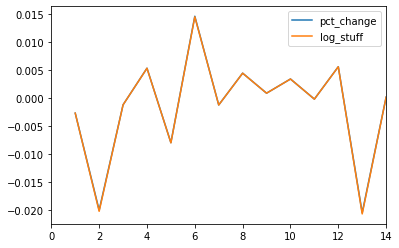

In [9]:
import pandas as pd

prices['pct_change'] = prices.pct_change(1)
prices['log_stuff'] = np.log(prices['prices'].astype('float64')/prices['prices'].astype('float64').shift(1))
prices[['pct_change', 'log_stuff']].plot();

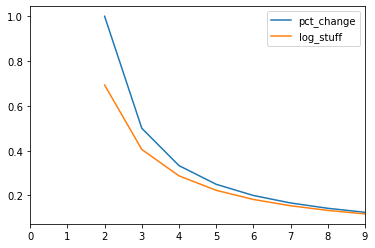

In [10]:
import pandas as pd

df = pd.DataFrame({'p': range(10)})

df['pct_change'] = df.pct_change()
df['log_stuff'] = \
    np.log(df['p'].astype('float64')/df['p'].astype('float64').shift(1))
df[['pct_change', 'log_stuff']].plot();

#### Annualized computations

In [11]:
#Annualized std over three periods
prices['pct_change'].rolling(window=3).std() * np.sqrt(252)

0          NaN
1          NaN
2          NaN
3     0.166477
4     0.209513
5     0.105852
6     0.180615
7     0.184479
8     0.127761
9     0.045715
10    0.029282
11    0.029383
12    0.046508
13    0.217955
14    0.218963
Name: pct_change, dtype: float64

### Multiperiod Returns

In [12]:
#Aggregated (or Total) multiperiod returns:
#Summing up individual period returns to derive the correct aggregated 
#multi-period performance return would only be correct in cases where 
#the period returns were additive (eg. log returns).
#Instead, discrete returns are multiplicative (arithmetic ones). 
# Thus,
#
# Multiperiod return = [Prod(1+Rt)]-1
#
# with the mean simplifies to:
#
# [(1+Rmean)**n_terms]-1

In [13]:
#Rolling aggregated multiperiod return
import numpy as np
# Both agg and apply will give you the same answer
cumprod1 = (1.+prices.prices.pct_change()).rolling(window=4).agg(lambda x : x.prod()) -1
cumprod1

0          NaN
1          NaN
2          NaN
3          NaN
4    -0.018547
5    -0.023749
6     0.010842
7     0.010815
8     0.009921
9     0.018939
10    0.007656
11    0.008713
12    0.009872
13   -0.011723
14   -0.014924
Name: prices, dtype: float64

In [14]:
# BUT apply(raw=True) will be much FASTER!
cumprod2 = (1.+prices.prices.pct_change()).rolling(window=4).apply(lambda x : x.prod(),raw=True) -1
cumprod2

0          NaN
1          NaN
2          NaN
3          NaN
4    -0.018547
5    -0.023749
6     0.010842
7     0.010815
8     0.009921
9     0.018939
10    0.007656
11    0.008713
12    0.009872
13   -0.011723
14   -0.014924
Name: prices, dtype: float64

In [27]:
#########################################
#  Log - Simple Return Equivalence
#########################################
N=13
leverage=1
logrets1=np.log(1+prices.prices.pct_change(1)).fillna(0)   #More stable numerically
logrets2=np.log(prices.prices / prices.prices.shift(1)).fillna(0)
logrets=logrets2
MultiLrets = leverage*np.exp(logrets.rolling(N+1).sum())-1

MultiSrets=leverage*(1+(prices.prices[0:N+1]).pct_change()).cumprod() - 1
MultiSrets.iloc[N]

-0.019541551152883918

In [28]:
MultiLrets.iloc[N]

-0.019541551152883918

In [29]:
MultiLrets = np.exp(logrets.fillna(0).cumsum())-1
MultiLrets.iloc[N]

-0.019541551152883918

In [29]:
####################
# Arithmetic means are wrong for dealing with per cent data. You should be using geometric means
# The geometric mean is more appropriate than the arithmetic mean for describing proportional growth, 
# both exponential growth (constant proportional growth) and varying growth; in business the geometric 
# mean of growth rates is known as the compound annual growth rate (CAGR). The geometric mean of growth 
# over periods yields the equivalent constant growth rate that would yield the same final amount.

# turn the daily tbill data into quarterly data
# use geometric means
from scipy.stats import gmean
myseries=ms.get_mstackHdata('GSPC.INDX','2021-01-01','2022-08-01',limit=80)[['Close']]/10000
pcts_qtrly = myseries.resample('Q').apply(lambda x: gmean(x).item())
pcts_qtrly.head(2)


/Users/rob/Desktop/PythonCode/Plib/DataFarm/MStack.py:58: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(resp['data']['eod'])
/Users/rob/Desktop/PythonCode/Plib/DataFarm/MStack.py:67: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  temp = json_normalize(resp2['data']['eod'])


Close
Date                
2021-03-31  0.386506
2021-06-30  0.418326

In [30]:
def calculate_ytd(row):
    year = row.name.year
    year_data = myseries[myseries.index.year == year]
    applicable_data = year_data[year_data.index <= row.name]
    return gmean(applicable_data['Close'])

pcts_qtrly['ytd'] = pcts_qtrly.apply(lambda r : calculate_ytd(r), axis=1)
pcts_qtrly

Close       ytd
Date                          
2021-03-31  0.386506  0.386506
2021-06-30  0.418326  0.402358
2021-09-30  0.442121  0.415476
2021-12-31  0.460039  0.426367
2022-03-31  0.446121  0.446121
2022-06-30  0.409833  0.427592
2022-09-30  0.392032  0.422249

### High Frequency

/Users/rob/opt/intelpython3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


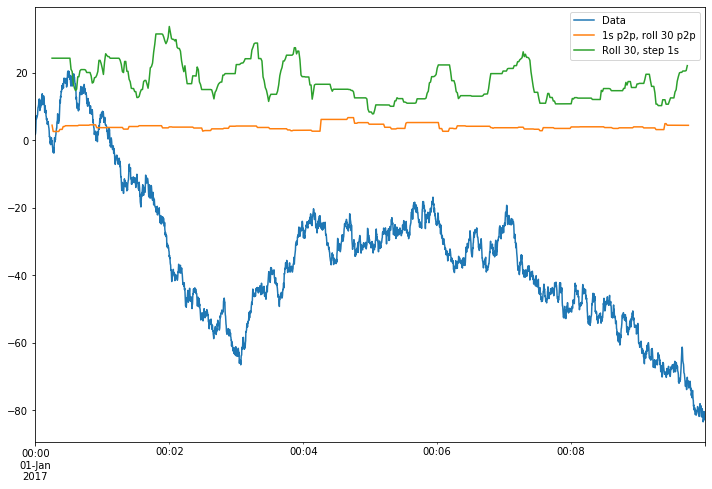

In [73]:
import pandas

# 10 minutes of data at 5Hz
n = 5 * 60 * 10
rng = pandas.date_range('1/1/2017', periods=n, freq='200ms')
np.random.seed(0)
d = np.cumsum(np.random.randn(n), axis=0)
s = pandas.Series(d, index=rng)

# Peak to peak
def p2p(d):
    return d.max() - d.min()

def p2p_arr(d):
    return d.max(axis=1) - d.min(axis=1)

def rolling_with_step(s, window, step, func):
    # See https://ga7g08.github.io/2015/01/30/Applying-python-functions-in-moving-windows/
    vert_idx_list = np.arange(0, s.size - window, step)
    hori_idx_list = np.arange(window)
    A, B = np.meshgrid(hori_idx_list, vert_idx_list)
    idx_array = A + B
    x_array = s.values[idx_array]
    idx = s.index[vert_idx_list + int(window/2.)]
    d = func(x_array)
    return pandas.Series(d, index=idx)

# Plot data
ax = s.plot(figsize=(12, 8), legend=True, label='Data')

# Plot resample then rolling (obviously does not work)
s.resample('1s').apply(p2p).rolling(window=30, center=True).apply(p2p).plot(ax=ax, label='1s p2p, roll 30 p2p', legend=True)

# Plot rolling window with step
rolling_with_step(s, window=30 * 5, step=5, func=p2p_arr).plot(ax=ax, label='Roll 30, step 1s', legend=True)


In [74]:
s

2017-01-01 00:00:00.000     1.764052
2017-01-01 00:00:00.200     2.164210
2017-01-01 00:00:00.400     3.142948
2017-01-01 00:00:00.600     5.383841
2017-01-01 00:00:00.800     7.251399
                             ...    
2017-01-01 00:09:59.000   -80.475346
2017-01-01 00:09:59.200   -81.382812
2017-01-01 00:09:59.400   -81.575217
2017-01-01 00:09:59.600   -82.787732
2017-01-01 00:09:59.800   -82.868331
Freq: 200L, Length: 3000, dtype: float64

In [75]:
from collections import deque
from itertools import islice

def sliding_window(iterable, size=2, step=1, fillvalue=None):
    if size < 0 or step < 1:
        raise ValueError
    it = iter(iterable)
    q = deque(islice(it, size), maxlen=size)
    if not q:
        return  # empty iterable or size == 0
    q.extend(fillvalue for _ in range(size - len(q)))  # pad to size
    while True:
        yield iter(q)  # iter() to avoid accidental outside modifications
        try:
            q.append(next(it))
        except StopIteration: # Python 3.5 pep 479 support
            return
        q.extend(next(it, fillvalue) for _ in range(step - 1))

In [42]:
import pandas as pd
import numpy as np

# the market return for May 2019 was approximated to be -6.52% or -0.06532.

dates = pd.DatetimeIndex(['2019-05-01', '2019-05-02', '2019-05-03', '2019-05-06',
                         '2019-05-07', '2019-05-08', '2019-05-09', '2019-05-10',
                         '2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16',
                         '2019-05-17', '2019-05-20', '2019-05-21', '2019-05-22',
                         '2019-05-23', '2019-05-24', '2019-05-27', '2019-05-28',
                         '2019-05-29', '2019-05-30', '2019-05-31'],
                         dtype='datetime64[ns]', name='DATE', freq=None)

daily_returns = np.array([-7.73787813e-03, -1.73277604e-03,  1.09124031e-02, -3.80437796e-03,
                       -1.66513456e-02, -1.67262934e-03, -2.77427734e-03,  4.01713274e-03,
                       -2.50407102e-02,  9.23270367e-03,  5.41897568e-03,  8.65419524e-03,
                       -6.83456209e-03, -6.54787106e-03,  9.04322511e-03, -4.05811322e-03,
                       -1.33152640e-02,  2.73398876e-03, -9.52000000e-05, -7.91438809e-03,
                       -7.16881982e-03,  1.19255102e-03, -1.24209547e-02])

daily_returns = pd.DataFrame(index = dates, data= daily_returns, columns = ["returns"])
daily_returns.resample("M").apply(lambda x: ((x + 1).cumprod() - 1).last("D"))


returns
DATE               
2019-05-31 -0.06532

In [7]:
index = pd.date_range('1/1/2000', periods=9, freq='6H')
series = pd.Series(range(9), index=index)
series

2000-01-01 00:00:00    0
2000-01-01 06:00:00    1
2000-01-01 12:00:00    2
2000-01-01 18:00:00    3
2000-01-02 00:00:00    4
2000-01-02 06:00:00    5
2000-01-02 12:00:00    6
2000-01-02 18:00:00    7
2000-01-03 00:00:00    8
Freq: 6H, dtype: int64

In [8]:
# The pandas resample function will not include 2000-01-02 in the bin because it's a different day.
series.rolling(5).mean().resample('D').first()


2000-01-01    NaN
2000-01-02    2.0
2000-01-03    6.0
Freq: D, dtype: float64

In [46]:
from numpy.random import randint
import pandas as pd

h=3
N=60*int(24/h)
# Create a df with a date-time index with data every 6 hours
rng = pd.date_range('1/5/2018 00:00', periods=N, freq=str(h)+'H')
df = pd.DataFrame({'returns':randint(1, 10, N)/1000}, index=rng)
type(df.index)
df.head(8)

#[0.003, 0.003, 0.006, 0.001, 0.001, 0.004, 0.001, 0.003]
#df.resample('D').mean(). -> 0.002750
#df.resample('D').sum().  -> 0.022
#df.resample('D').first().  -> 0.003
#df.resample('D').last().  -> 0.003


returns
2018-01-05 00:00:00    0.003
2018-01-05 03:00:00    0.003
2018-01-05 06:00:00    0.006
2018-01-05 09:00:00    0.001
2018-01-05 12:00:00    0.001
2018-01-05 15:00:00    0.004
2018-01-05 18:00:00    0.001
2018-01-05 21:00:00    0.003

In [60]:
df = pd.DataFrame({'returns':randint(1, 10, N)}, index=rng)
df.head(8)


returns
2018-01-05 00:00:00        3
2018-01-05 03:00:00        9
2018-01-05 06:00:00        4
2018-01-05 09:00:00        5
2018-01-05 12:00:00        3
2018-01-05 15:00:00        4
2018-01-05 18:00:00        6
2018-01-05 21:00:00        9